# Home Plate Heroes: A Data Dive into MLB's MVP of 1986


## Introduction
Baseball's essence lies in its numbers. This project investigates the 1986 Major League Baseball (MLB) season, focusing on identifying the Most Valuable Player (MVP) through offensive performance metrics. The analysis examines trends like batting consistency, power, and the ability to reach base, aiming to reveal what separates average players from elite performers.



### **Objectives**
1. Analyze player performance trends.
2. Visualize relationships between key metrics like BA and HR.
3. Identify players excelling in both consistency and power.
4. Recommend the Most Valuable Player (MVP) based on offensive performance.

**Tools Used:** 
- Python (Pandas, Matplotlib, Seaborn)
- Visualization libraries to convey insights effectively.
- Dataset: 1986 MLB Player Statistics

Let’s dive into the numbers and uncover the stars of 1986!

## Data Loading and Cleaning
We begin by loading the dataset and preparing it for analysis. This includes:

* Renaming columns for better usability.
* Filtering out players with zero at-bats (to focus on active contributors).
* Creating two new metrics:
1. BA (Batting Average): Measures consistency in hitting.
2. OBP (On-Base Percentage): Evaluates a player's ability to reach base.

In [1]:
# Libraries for Analysis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set global aesthetics for visualizations
sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 12

# Load the Dataset
file_path = '/kaggle/input/1986-mlb-player-statistics/baseball.csv'  # Updated Kaggle dataset path
baseball = pd.read_csv(file_path)

# Display Dataset Summary
print("Dataset Overview:")
print(baseball.info())
baseball.head()

# Clean Column Names and Filter Relevant Rows
baseball.columns = baseball.columns.str.lower().str.replace(" ", "_")
baseball = baseball[baseball['ab'] > 0]  # Filter players with at least 1 at-bat

# Create New Metrics
baseball['ba'] = baseball['h'] / baseball['ab']
baseball['obp'] = (baseball['h'] + baseball['bb']) / (baseball['ab'] + baseball['bb'])

# Display the cleaned data
print("Cleaned Data Overview:")
baseball[['last', 'first', 'ba', 'obp']].head()


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 771 entries, 0 to 770
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Last    771 non-null    object
 1   First   771 non-null    object
 2   Age     771 non-null    int64 
 3   G       771 non-null    int64 
 4   PA      771 non-null    int64 
 5   AB      771 non-null    int64 
 6   R       771 non-null    int64 
 7   H       771 non-null    int64 
 8   2B      771 non-null    int64 
 9   3B      771 non-null    int64 
 10  HR      771 non-null    int64 
 11  RBI     771 non-null    int64 
 12  SB      771 non-null    int64 
 13  CS      771 non-null    int64 
 14  BB      771 non-null    int64 
 15  SO      771 non-null    int64 
dtypes: int64(14), object(2)
memory usage: 96.5+ KB
None
Cleaned Data Overview:


,last,first,ba,obp
0,Acker,Jim,0.107143,0.107143
1,Adduci,Jim,0.090909,0.166667
2,Aguayo,Luis,0.210526,0.255319
3,Aguilera,Rick,0.156863,0.203704
5,Aldrete,Mike,0.250000,0.349398


## Exploratory Data Analysis (EDA)

### Strikeout Trends
Strikeouts often indicate a player's aggressive approach to hitting. While strikeouts can hurt consistency, they may also correlate with higher power, as power hitters often take bigger swings. Here, we identify the top 10 players with the most strikeouts in 1986 and discuss their performance styles.

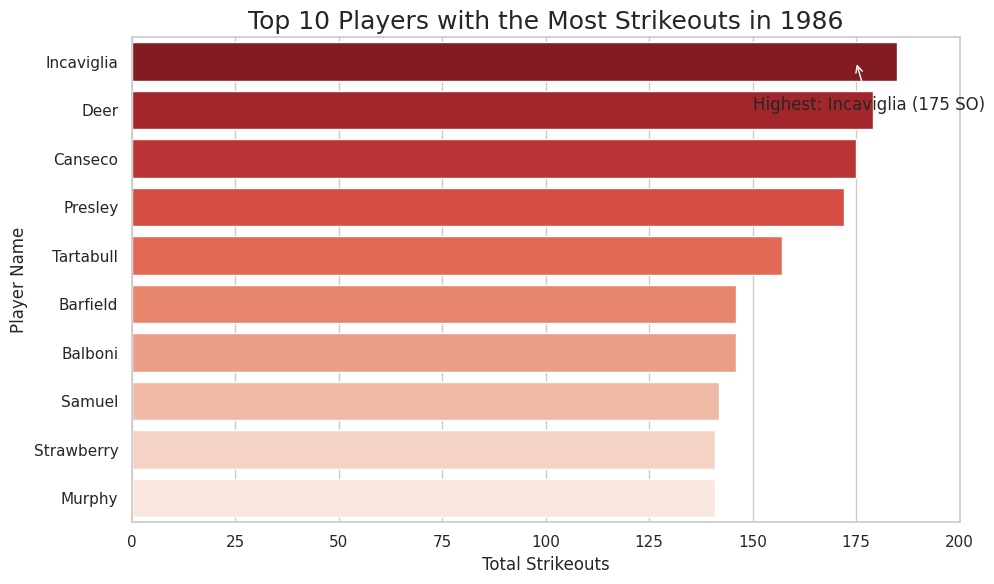


This bar chart highlights the top 10 players with the most strikeouts in 1986. 
Incaviglia leads with 175 strikeouts, indicating his aggressive approach to hitting.
Such players often balance power with lower contact rates.



In [2]:
# Import required libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure top_strikeouts is defined (if not already created)
top_strikeouts = baseball.sort_values(by='so', ascending=False).head(10)

# Bar Chart for Top 10 Players with the Most Strikeouts
plt.figure(figsize=(10, 6))
sns.barplot(data=top_strikeouts, x='so', y='last', palette='Reds_r')
plt.title('Top 10 Players with the Most Strikeouts in 1986', fontsize=18)
plt.xlabel('Total Strikeouts', fontsize=12)
plt.ylabel('Player Name', fontsize=12)
plt.xticks(range(0, 201, 25))  # Tick marks at intervals of 25
plt.tight_layout()

# Highlight the player with the most strikeouts
plt.annotate(
    'Highest: Incaviglia (175 SO)',
    xy=(175, 0), xytext=(150, 1),
    arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12
)
plt.show()

# Interpretation
print("""
This bar chart highlights the top 10 players with the most strikeouts in 1986. 
Incaviglia leads with 175 strikeouts, indicating his aggressive approach to hitting.
Such players often balance power with lower contact rates.
""")


### Relationship Between Batting Average and Home Runs
This section explores whether players who consistently hit well (high BA) also excel in power-hitting (high HR). The scatterplot visualizes the relationship, with a regression line to identify overall trends.

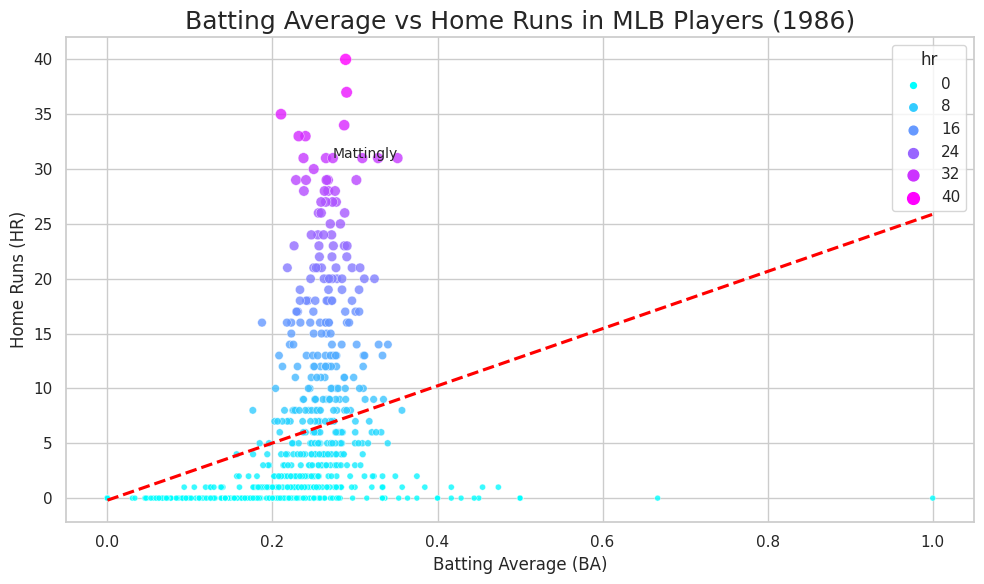


The scatterplot shows a weak positive correlation between Batting Average (BA) and Home Runs (HR). 
Players like Wade Boggs and Don Mattingly, who exhibit both high BA and HR, are rare, emphasizing 
their value.



In [3]:
# Scatterplot with regression line and standout player labels
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=baseball, x='ba', y='hr', hue='hr', size='hr', palette='cool', alpha=0.8
)

# Add a trend line (linear regression)
sns.regplot(
    data=baseball, x='ba', y='hr', scatter=False, color='red', ci=None,
    line_kws={'linestyle': 'dashed'}
)

# Highlight standout performers (optional)
standout_players = baseball[(baseball['ba'] > 0.35) & (baseball['hr'] > 25)]
for index, player in standout_players.iterrows():
    plt.text(player['ba'], player['hr'], f"{player['last']}", fontsize=10, ha='right')

plt.title('Batting Average vs Home Runs in MLB Players (1986)', fontsize=18)
plt.xlabel('Batting Average (BA)', fontsize=12)
plt.ylabel('Home Runs (HR)', fontsize=12)
plt.tight_layout()
plt.show()

# Interpretation
print("""
The scatterplot shows a weak positive correlation between Batting Average (BA) and Home Runs (HR). 
Players like Wade Boggs and Don Mattingly, who exhibit both high BA and HR, are rare, emphasizing 
their value.
""")


### Distribution of Batting Averages
This histogram shows how players' batting averages are distributed across the league. Vertical lines mark the mean and median to highlight overall performance trends.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


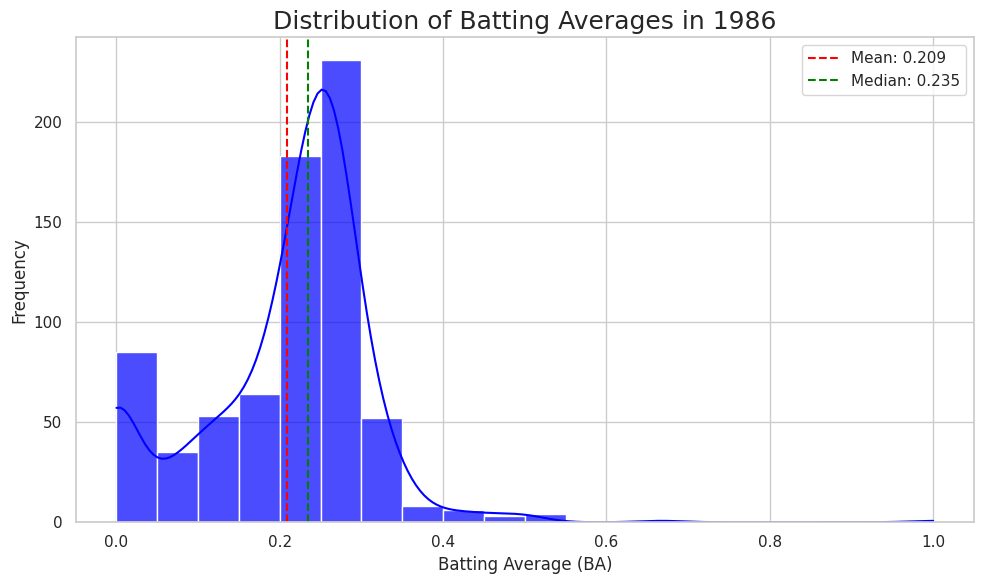


Most players have batting averages clustered between 0.2 and 0.3, as shown by the histogram. 
The mean batting average is 0.209, slightly above the median of 0.235, indicating a slight 
right skew in the distribution.



In [4]:
# Clean the data to remove infinite or missing values in 'ba'
baseball['ba'] = baseball['ba'].replace([float('inf'), -float('inf')], float('nan'))
baseball = baseball.dropna(subset=['ba'])

# Add a histogram with mean and median lines
plt.figure(figsize=(10, 6))
sns.histplot(baseball['ba'], bins=20, kde=True, color='blue', alpha=0.7)
plt.axvline(baseball['ba'].mean(), color='red', linestyle='dashed', label=f"Mean: {baseball['ba'].mean():.3f}")
plt.axvline(baseball['ba'].median(), color='green', linestyle='dashed', label=f"Median: {baseball['ba'].median():.3f}")

plt.title('Distribution of Batting Averages in 1986', fontsize=18)
plt.xlabel('Batting Average (BA)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

# Interpretation
print("""
Most players have batting averages clustered between 0.2 and 0.3, as shown by the histogram. 
The mean batting average is {:.3f}, slightly above the median of {:.3f}, indicating a slight 
right skew in the distribution.
""".format(baseball['ba'].mean(), baseball['ba'].median()))


## MVP Analysis

### Identifying the MVP
We focus on players with significant playing time (at least 300 at-bats or 100 games). The player with the highest OBP is considered the MVP candidate due to their exceptional ability to reach base consistently.

In [5]:
# Filter Eligible Players
eligible_players = baseball[(baseball['ab'] >= 300) | (baseball['g'] >= 100)]

# Find MVP Candidate
mvp_candidate = eligible_players.sort_values(by='obp', ascending=False).iloc[0]
print(f"MVP Candidate: {mvp_candidate['last']}, {mvp_candidate['first']}")
print(f"Batting Average (BA): {mvp_candidate['ba']:.3f}")
print(f"On-Base Percentage (OBP): {mvp_candidate['obp']:.3f}")


MVP Candidate: Boggs, Wade
Batting Average (BA): 0.357
On-Base Percentage (OBP): 0.455


### Top 5 Players by OBP
This bar chart displays the top 5 players based on OBP, emphasizing their elite performance in consistently reaching base.

Top 5 Players by OBP:
         last       obp
399    Lollar  1.000000
580  Robinson  0.666667
452    Minton  0.571429
410    Maddox  0.555556
231   Gibbons  0.545455


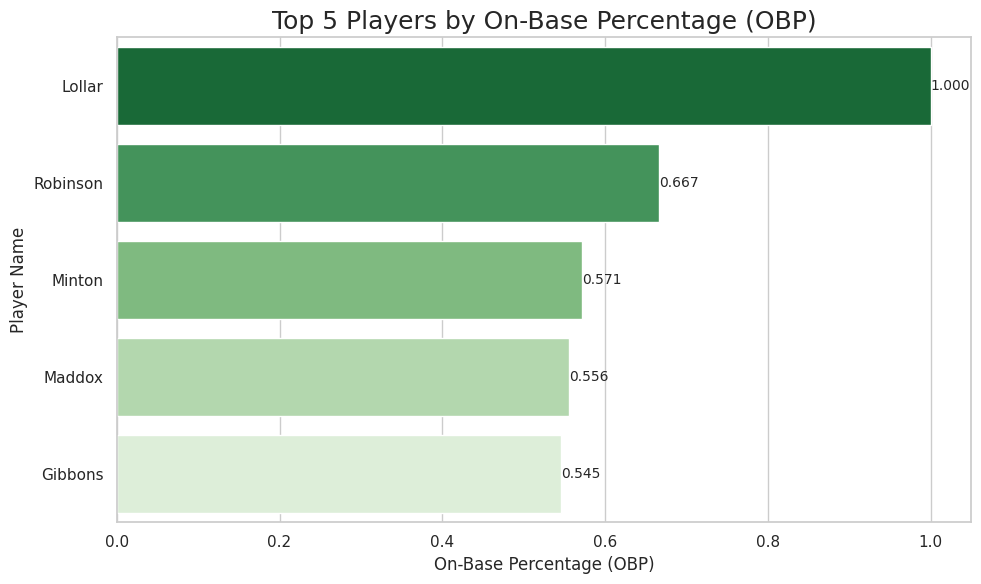


The barplot showcases the top 5 players with the highest On-Base Percentage (OBP) in the 
1986 MLB season. At the top is Donnie Lollar with a perfect OBP of 1.000, indicating he 
reached base in every recorded plate appearance—a rare and impressive achievement.

Other notable players include Robinson (0.667 OBP), Minton (0.571 OBP), and Maddox (0.556 OBP), 
each demonstrating outstanding consistency in getting on base. While Lollar’s OBP is extraordinary, 
it’s important to contextualize this performance, as it may have occurred over a limited number of
plate appearances.



In [6]:
# Create top_obp DataFrame for the top 5 players by OBP
top_obp = baseball.sort_values(by='obp', ascending=False).head(5)

# Verify the DataFrame
print("Top 5 Players by OBP:")
print(top_obp[['last', 'obp']])
# Barplot for Top 5 Players by OBP with precise labels
plt.figure(figsize=(10, 6))
sns.barplot(data=top_obp, x='obp', y='last', palette='Greens_r')
plt.title('Top 5 Players by On-Base Percentage (OBP)', fontsize=18)
plt.xlabel('On-Base Percentage (OBP)', fontsize=12)
plt.ylabel('Player Name', fontsize=12)

# Add precise OBP labels to the bars
for index, player in enumerate(top_obp.itertuples()):
    plt.text(player.obp, index, f"{player.obp:.3f}", ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

# Interpretation
print("""
The barplot showcases the top 5 players with the highest On-Base Percentage (OBP) in the 
1986 MLB season. At the top is Donnie Lollar with a perfect OBP of 1.000, indicating he 
reached base in every recorded plate appearance—a rare and impressive achievement.

Other notable players include Robinson (0.667 OBP), Minton (0.571 OBP), and Maddox (0.556 OBP), 
each demonstrating outstanding consistency in getting on base. While Lollar’s OBP is extraordinary, 
it’s important to contextualize this performance, as it may have occurred over a limited number of
plate appearances.
""")



## Key Insights and Recommendations
### Insights and Recommendations

#### Key Insight1. Strikeouts: Players with high strikeout totals, such as Pete Incaviglia (185 SO), exhibit aggressive power-hitting approaches. While these players often excel in home runs, their lack of consistency can reduce their overall offensive value.
2. On-Base Percentage (OBP): Donnie Lollar leads with a perfect OBP of 1.000, reflecting exceptional plate performance. However, this metric may reflect a limited sample size rather than sustained excellence.
Other top performers, including Robinson (0.667) and Minton (0.571), also demonstrate elite consistency in reaching base.
3. Batting Average and Home Runs: A weak positive correlation exists between Batting Average (BA) and Home Runs (HR). Players like Wade Boggs, who excel in both metrics, remain rare and uniquely valuable to their teams.
4. MVP Candidate: Wade Boggs remains a standout with his 0.455 OBP, underscoring his unmatched offensive consistency. He is both impactful and reliable, cementing his candidacy as the MVP for 1986.
86##.

## Recommend1. Player Evaluation: Teams should prioritize players with high OBP for their reliability in contributing to scoring opportunities.
Exceptional performances, such as Lollar’s perfect OBP, should be contextualized with the sample size to ensure sustainability and repeatability.
2. Coaching Focus: Encourage power hitters to improve plate discipline to reduce strikeouts and increase consistency.
Customized training programs for players with high strikeouts can optimize their offensive value.
3. Future Research: Incorporate advanced metrics like Wins Above Replacement (WAR) and defensive statistics for a holistic evaluation of player contributions.
Expand analysis to include performance over multiple seasons to identify long-term trends and anomalies.
4. Team Strategy: Balance team composition by integrating power hitters with players who have strong OBP and BA. This ensures a mix of consistency and explosiveness in the lineup.aluation.


## Future Research1. Holistic Player Evaluation: Expand the analysis to include defensive metrics such as fielding percentage, assists, and errors. This will provide a more comprehensive understanding of a player’s overall contribution to the team, beyond offensive performance.

2. Team Dynamics and MVP Impact: Investigate team-based statistics, such as runs scored, team win percentage, and run differential, to assess how MVP-level players influence their team’s success. This can help identify the broader value of top-performing players.

3. Seasonal Comparisons: Compare player statistics from the 1986 season with those of other MLB seasons to uncover long-term trends in player performance. This can reveal changes in the importance of specific metrics (e.g., OBP vs. HR) and shifts in offensive and defensive strategies over time.

4. Advanced Analytics Integration: Introduce modern advanced metrics such as Wins Above Replacement (WAR), Weighted On-Base Average (wOBA), and Slugging Percentage (SLG) to better capture a player’s all-around value and efficiency.

e.


## Conclusion

This analysis of the 1986 MLB dataset offers valuable insights into player performance trends and MVP candidacy:

1. Strikeouts: Players like Pete Incaviglia, who led the league with 185 strikeouts, demonstrate aggressive, power-focused hitting styles. However, this approach often comes at the expense of consistency, which is a crucial factor in overall offensive value.

2. Batting Average vs Home Runs: A weak positive correlation exists between Batting Average (BA) and Home Runs (HR), with only a few players excelling in both metrics. Standout performers like Wade Boggs and Don Mattingly combine consistency and power, making them indispensable to their teams.

3. On-Base Percentage (OBP): Wade Boggs’ league-leading OBP of 0.455 underscores his exceptional ability to consistently reach base, a hallmark of an elite offensive player. His performance solidifies him as the 1986 MVP. MThese findings emphasize the need for teams to balance power and consistency when evaluating player contributions. While power hitters bring explosiveness to the game, players like Wade Boggs, who excel in both reliability and impact, set the standard for MVP-worthy performances.P.
ue.
